### DACON(데이콘) 데이콘 Basic 자동차 가격 예측 AI 경진대회

##### EDA

In [1]:
import pandas as pd

train_df = pd.read_csv('data//train.csv')
train_df

ID  생산년도  모델출시년도            브랜드      차량모델명 판매도시 판매구역    주행거리  \
0      TRAIN_00000  2018    2014          skoda      fabia  KAT  SLA   85231   
1      TRAIN_00001  2010    2006         toyota      auris  RKO  SWI  135000   
2      TRAIN_00002  2002    2002  mercedes-benz  clk-klasa  GNI  WIE  255223   
3      TRAIN_00003  2006    2001         nissan    x-trail  EHX  WIE  238000   
4      TRAIN_00004  2007    2007           fiat      bravo  OSW  MAL  251000   
...            ...   ...     ...            ...        ...  ...  ...     ...   
57915  TRAIN_57915  2017    2011  mercedes-benz    b-klasa  POZ  WIE   64839   
57916  TRAIN_57916  2006    2005           opel     zafira  XOK  ZAC  299850   
57917  TRAIN_57917  2013    2003           fiat      punto  CIE  MAZ  112000   
57918  TRAIN_57918  2006    2004           opel      astra  ZRI  DOL  189321   
57919  TRAIN_57919  2005    2004            bmw    seria-1  EIX  SLA  144744   

        배기량  압축천연가스(CNG)  경유  가솔린  하이브리드  액화석유가스(LPG)      가격  
0       999            0   0    1      0            0   51.74  
1      1598            0   0    1      0            0   41.47  
2      1796            0   0    1      0            0   17.81  
3      2184            0   1    0      0            0   18.20  
4      1910            0   1    0      0            0   17.55  
...     ...          ...  ..  ...    ...          ...     ...  
57915  1461            0   1    0      0            0  116.87  
57916  1796            0   0    1      0            0   15.47  
57917  1368            0   0    1      0            0   21.97  
57918  1598            0   0    1      0            0   16.77  
57919  1596            0   0    1      0            0   19.50  

[57920 rows x 15 columns]

In [2]:
test_df = pd.read_csv('data//test.csv')
test_df

ID  생산년도  모델출시년도         브랜드     차량모델명 판매도시 판매구역    주행거리   배기량  \
0      TEST_00000  2017    2013       mazda         3  KAL  WIE   57000  1998   
1      TEST_00001  2011    2008        ford    fiesta  ROP  POD  159000  1242   
2      TEST_00002  2019    2017  volkswagen      polo  LOD  LOD   11284   999   
3      TEST_00003  2021    2016     renault    megane  JAW  SLA       9  1332   
4      TEST_00004  2010    2011       volvo       v60  WEJ  POM  270000  1999   
...           ...   ...     ...         ...       ...  ...  ...     ...   ...   
14475  TEST_14475  2012    2008       honda      jazz  PIA  MAZ   77405  1339   
14476  TEST_14476  2011    2008     renault    kangoo  MJU  POM  228559  1461   
14477  TEST_14477  2018    2012      toyota     auris  POO  DOL   17412  1798   
14478  TEST_14478  2017    2008     renault    megane  WAR  MAZ  193000  1461   
14479  TEST_14479  2013    2008        opel  insignia  BOJ  SLA  230000  1956   

       압축천연가스(CNG)  경유  가솔린  하이브리드  액화석유가스(LPG)  
0                0   0    1      0            0  
1                0   0    1      0            0  
2                0   0    1      0            0  
3                0   0    1      0            0  
4                0   0    1      0            0  
...            ...  ..  ...    ...          ...  
14475            0   0    1      0            0  
14476            0   1    0      0            0  
14477            0   0    0      1            0  
14478            0   1    0      0            0  
14479            0   1    0      0            0  

[14480 rows x 14 columns]

In [3]:
prd_year = train_df['생산년도'].value_counts()
rel_year = train_df['모델출시년도'].value_counts()
brand = train_df['브랜드'].value_counts()
car_model = train_df['차량모델명'].value_counts()

In [14]:
car_model

차량모델명
astra        2537
a4           2082
seria-3      1998
golf         1910
focus        1647
             ... 
omega          17
frontera       14
s3              7
gle-klasa       2
g-klasa         1
Name: count, Length: 143, dtype: int64

In [13]:
len(set(car_model.index))

143

In [4]:
prd_year

생산년도
2009    4306
2017    4175
2008    4091
2010    3942
2011    3914
2018    3584
2012    3522
2016    3505
2007    3428
2014    3134
2013    3034
2015    2919
2006    2907
2005    2239
2019    1831
2004    1697
2021    1227
2003    1124
2002     798
2020     756
2001     514
2000     319
1999     264
2022     204
1998     177
1997      95
1996      62
1994      39
1995      39
1991      22
1993      17
1992      15
1990       7
1989       7
1988       2
1985       1
1983       1
1978       1
1987       1
Name: count, dtype: int64

In [5]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

##### 칼럼별 가격 시각화

In [6]:
# plt.figure(figsize=(20,10))
# for i in range(0,6):
#     plt.subplot(2,3,i+1)
#     plt.scatter(train_num.iloc[:,i], train_num['Price'])
#     plt.title(train_num.columns[i])

##### 생상년도(연식)별 가격 분포

Text(0.5, 1.0, '생산년도(연식)')

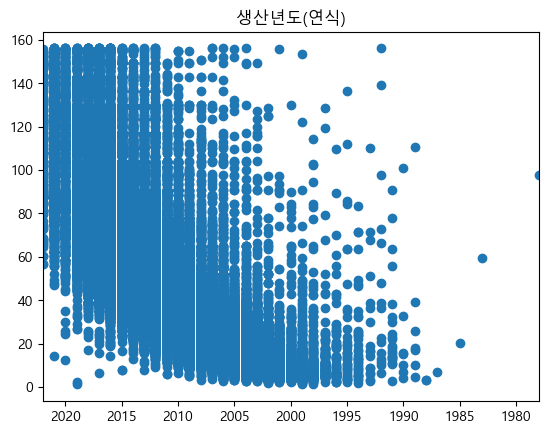

In [7]:
import matplotlib.pyplot as plt

plt.scatter(train_df['생산년도'], train_df['가격'])
plt.xlim(max(train_df['생산년도']),min(train_df['생산년도']))
plt.title('생산년도(연식)')

##### 주행거리별 가격 분포

Text(0.5, 1.0, '주행거리(km)')

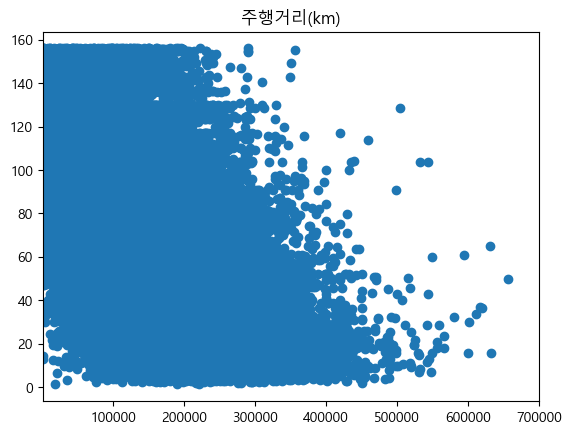

In [8]:
plt.scatter(train_df['주행거리'], train_df['가격'])
plt.xlim(200,700000)
plt.title('주행거리(km)')

##### 차종 분포

<Axes: ylabel='차량모델명'>

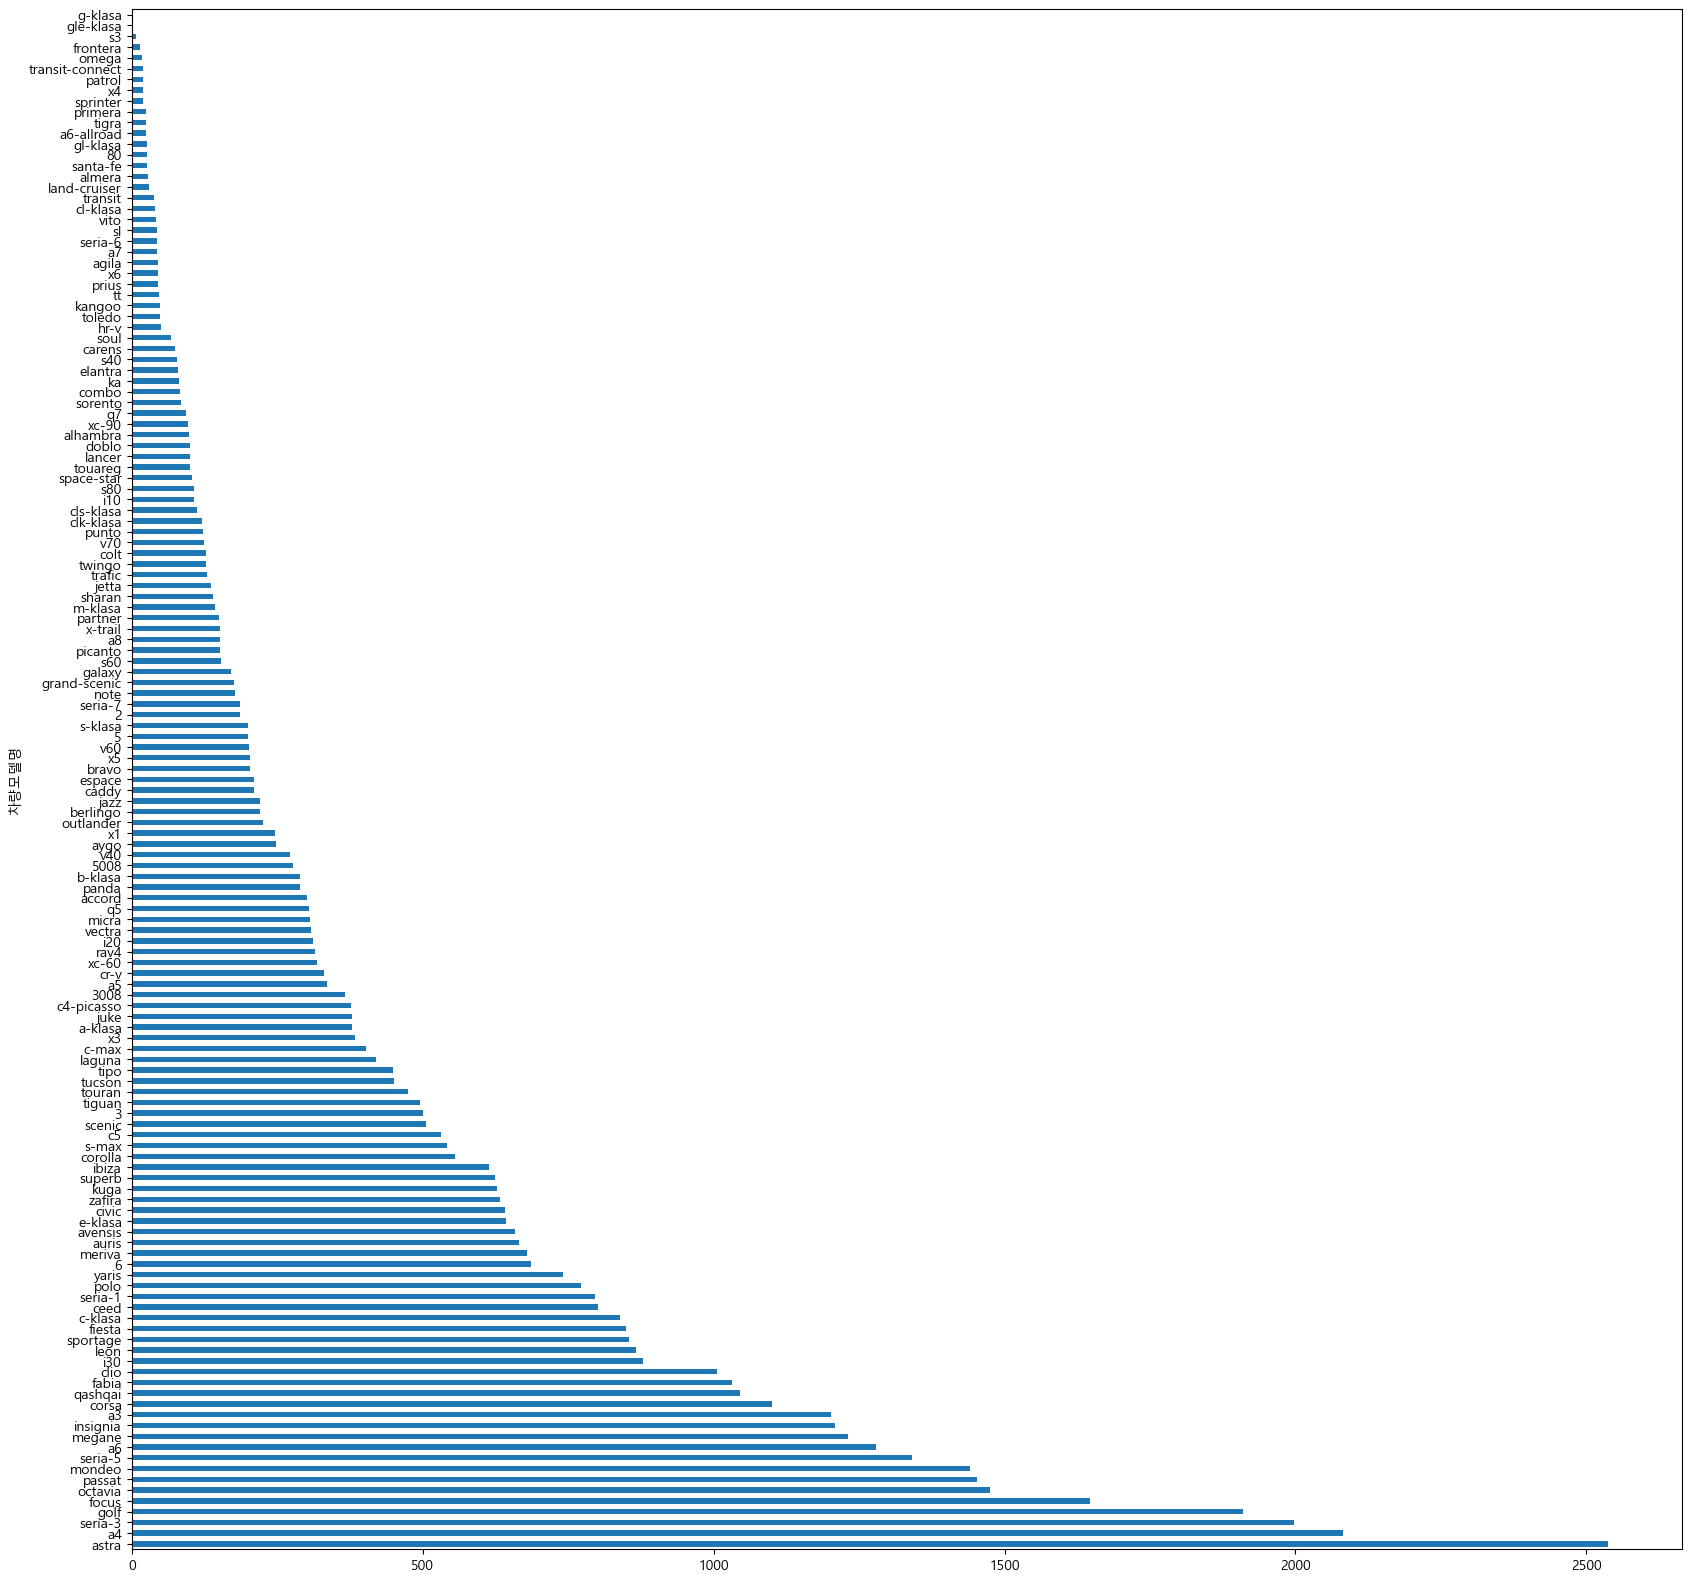

In [9]:
car_model = train_df['차량모델명'].value_counts()
car_model.plot(kind='barh',fontsize='10',figsize=(20,20))

##### 상관관계

In [6]:
# 구현중

##### 주행거리 value_counts

In [ ]:
import seaborn as sns
km = train_df['주행거리'].value_counts()

##### 생산년도 value_counts

<Axes: ylabel='생산년도'>

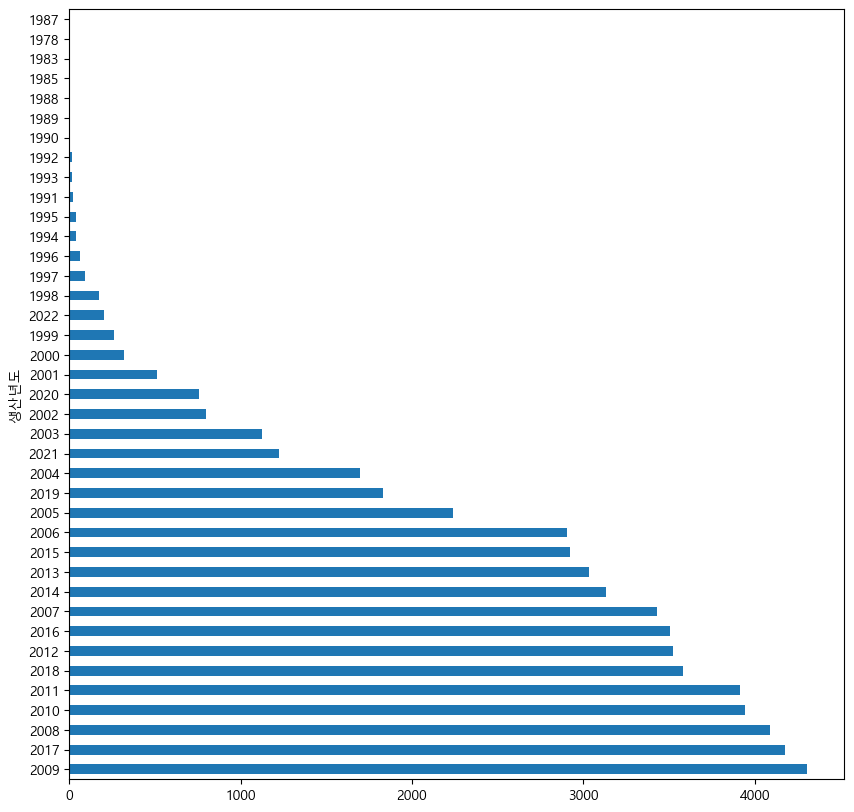

In [26]:
# import matplotlib.pyplot as plt

prd_year.plot(kind='barh',fontsize='10',figsize=(10,10))

##### 모델출시년도 value_counts

<Axes: ylabel='모델출시년도'>

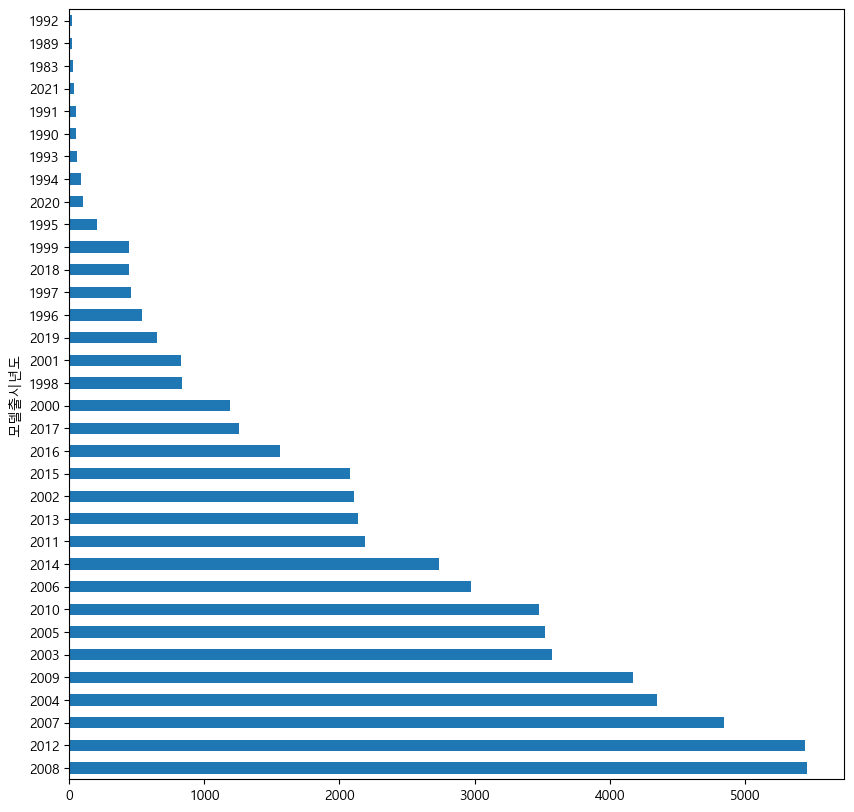

In [27]:
rel_year.plot(kind='barh',fontsize='10',figsize=(10,10))

##### 브랜드 value_counts

<Axes: ylabel='브랜드'>

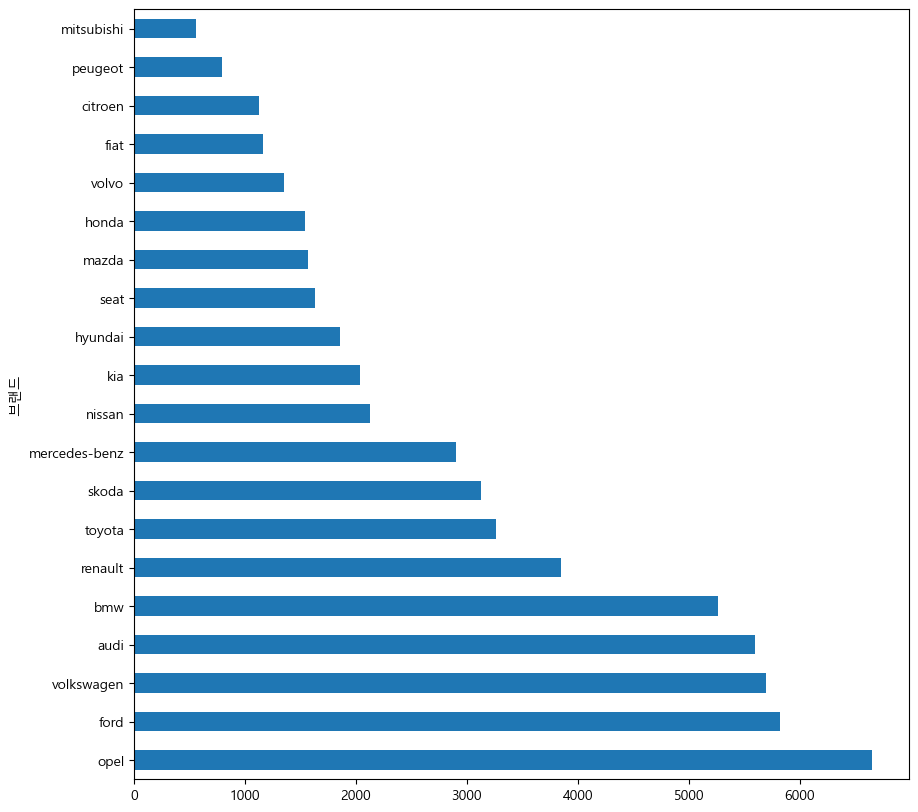

In [28]:
brand.plot(kind='barh',fontsize='10',figsize=(10,10))

##### 차량모델명 value_counts

<Axes: ylabel='차량모델명'>

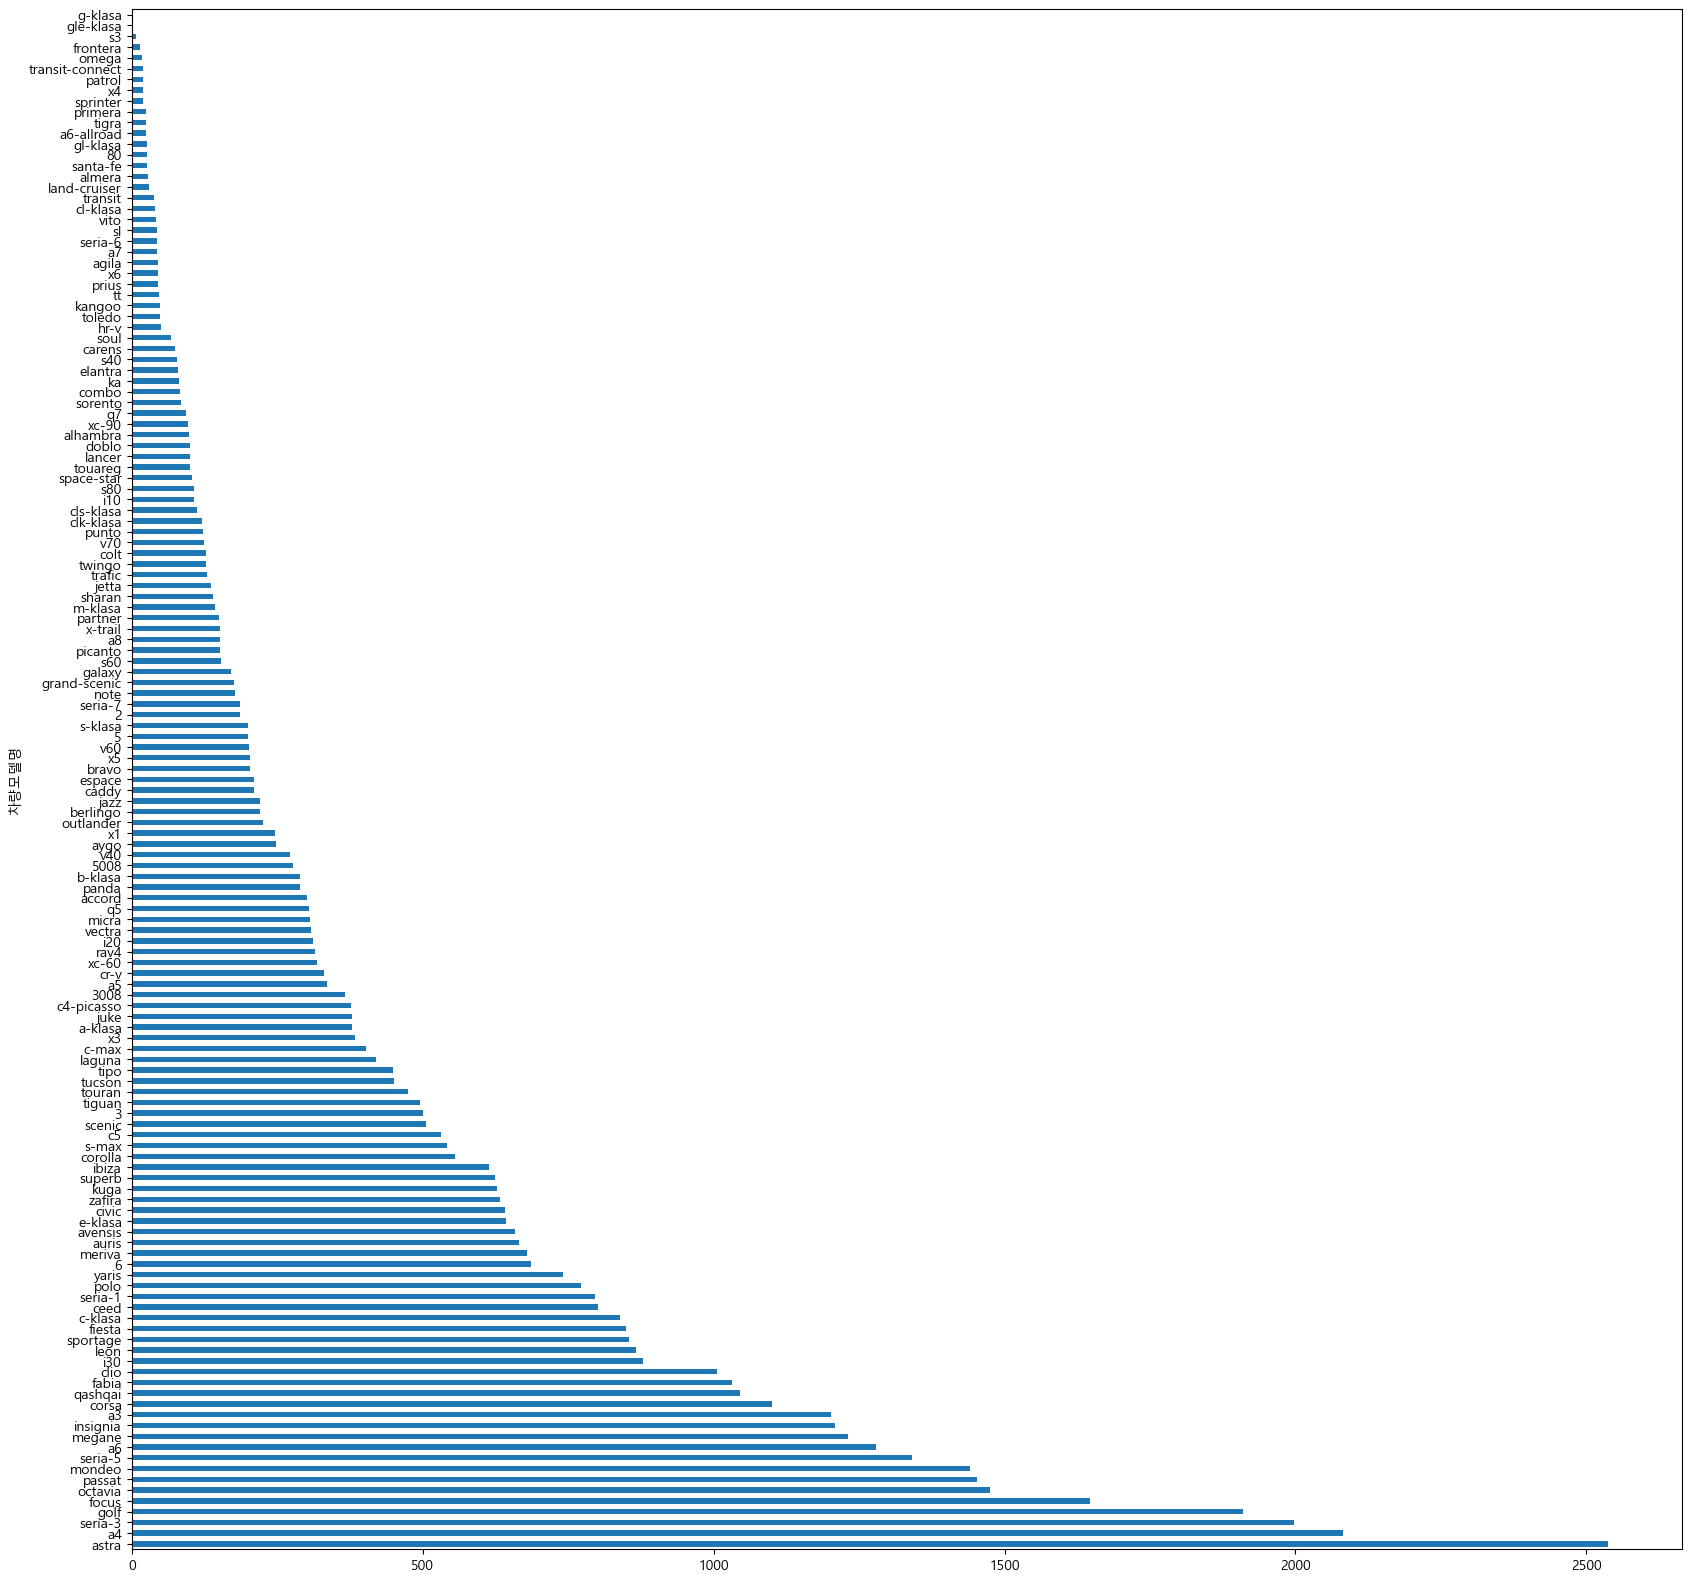

In [29]:
car_model.plot(kind='barh',fontsize='10',figsize=(20,20))

##### 가격별 countplot, histogram

<Axes: xlabel='가격', ylabel='count'>

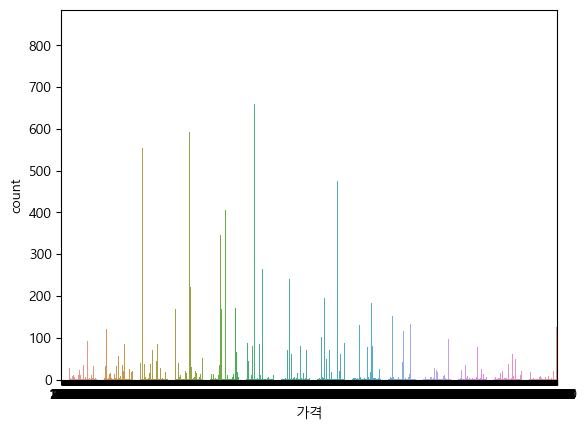

In [45]:
import seaborn as sns

sns.countplot(x=train_df['가격'])

<Axes: xlabel='로그_가격', ylabel='count'>

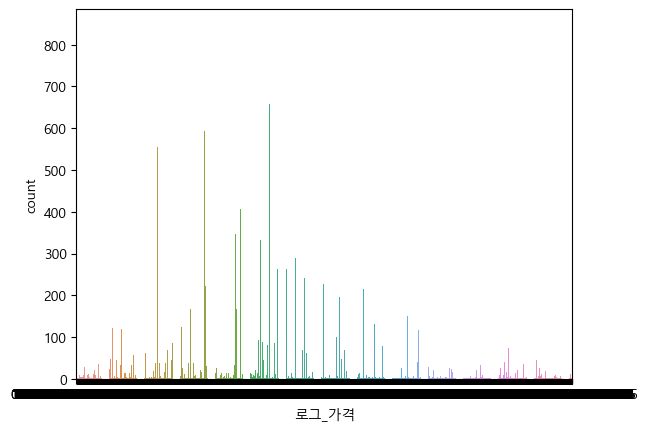

In [44]:
import seaborn as sns
import math
import numpy as np

train_df['로그_가격'] = np.log1p(train_df['가격'])

sns.countplot(x=train_df['로그_가격'])

<Axes: xlabel='가격', ylabel='Count'>

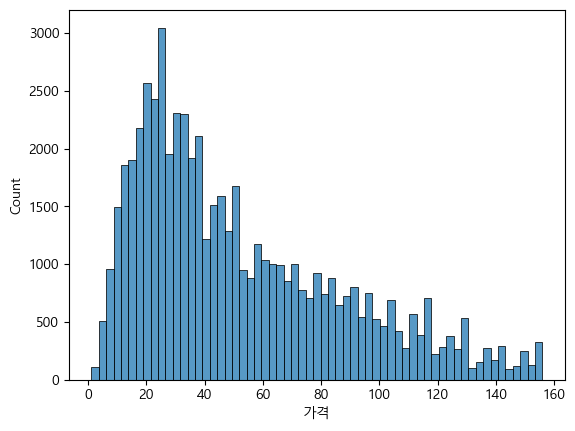

In [46]:
sns.histplot(x=train_df['가격'])

<Axes: xlabel='로그_가격', ylabel='Count'>

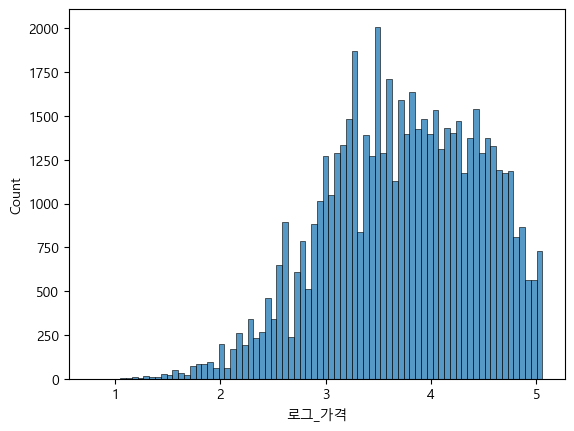

In [48]:
train_df['로그_가격'] = np.log1p(train_df['가격'])

sns.histplot(x=train_df['로그_가격'])

##### 브랜드별 가격분포 BoxPlot 

<Axes: xlabel='가격', ylabel='브랜드'>

c:\Users\user\miniconda3\envs\py\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\miniconda3\envs\py\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\miniconda3\envs\py\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 48652 (\N{HANGUL SYLLABLE BEU}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\miniconda3\envs\py\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 47004 (\N{HANGUL SYLLABLE RAEN}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\miniconda3\envs\py\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\miniconda3\envs\py\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Gl

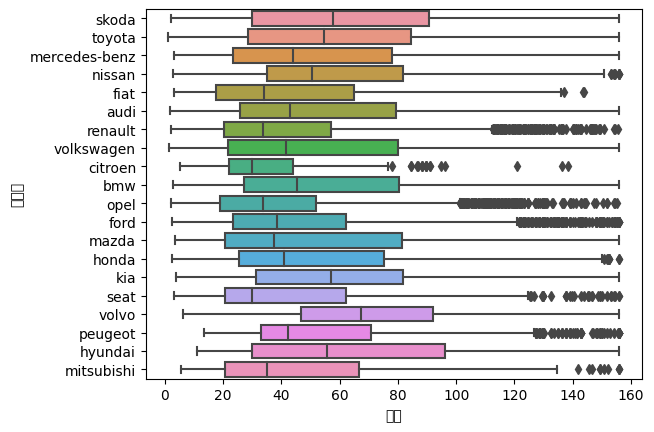

In [59]:
import seaborn as sns

sns.boxplot(x='가격',y='브랜드',data=train_df)

In [36]:
# 브랜드별 가격 분포 boxplot이다
# 이상치가 거의없거나 적은 'fiat'과 'volvo'라는 브랜드만 비교해보았을 때는 브랜드에 따른 가격 형성의 차이가 존재한다고 볼 수 있다.
# 하지만 위 지표는 중고차 가격에 가장 많은 영향을 미친다고 하는 '연식', '주행거리'를 고려하지 않았기 때문에 브랜드별 가격 추이를 파악하기는 어렵다.
# 단, 전체 그래프에서 보았을 때 box들이 중간 아래에 위치한 것으로 보아 대부분의 차량들이 전반적으로 낮은 가격대를 형성한다는 것을 알 수 있다.

# 일정 범위의 '연식'을 고정한 브랜드별 가격 분포 boxplot을 다시 출력해보자 

In [76]:
# 상위 1개 연식(생산년도)
most1_prd = train_df['생산년도'].value_counts().index[:1]
most1_prd = list(most1_prd)
most1_prd

[2009]

In [77]:
most1_prd_df = train_df[train_df['생산년도'].isin(most1_prd)]
most1_prd_df

ID  생산년도  모델출시년도         브랜드    차량모델명 판매도시 판매구역    주행거리   배기량  \
11     TRAIN_00011  2009    2005        opel   zafira  AHW  KUJ  180000  1900   
12     TRAIN_00012  2009    2006        ford   galaxy  PLO  MAZ  236424  1997   
14     TRAIN_00014  2009    2008       honda     jazz  GHC  LUB  212000  1339   
17     TRAIN_00017  2009    2001  volkswagen     polo  CHE  KUJ  189967  1198   
30     TRAIN_00030  2009    2007        audi       a4  SRO  DOL  123691  1968   
...            ...   ...     ...         ...      ...  ...  ...     ...   ...   
57873  TRAIN_57873  2009    2007      nissan  qashqai  BYU  MAZ  278646  1598   
57883  TRAIN_57883  2009    2008     renault   megane  WZW  DOL  140000  1397   
57887  TRAIN_57887  2009    2006        opel    corsa  MOG  KUJ  124000  1364   
57888  TRAIN_57888  2009    2008        seat    ibiza  KRA  MAL  116900  1198   
57896  TRAIN_57896  2009    2007     hyundai      i30  GRU  KUJ  241000  1396   

       압축천연가스(CNG)  경유  가솔린  하이브리드  액화석유가스(LPG)     가격  
11               0   1    0      0            0  30.55  
12               0   1    0      0            0  33.67  
14               0   0    1      0            0  22.10  
17               0   0    1      0            0  17.42  
30               0   1    0      0            0  46.80  
...            ...  ..  ...    ...          ...    ...  
57873            0   0    1      0            0  28.60  
57883            0   0    1      0            0  30.68  
57887            0   0    1      0            0  19.37  
57888            0   0    1      0            0  22.88  
57896            0   0    1      0            0  20.67  

[4306 rows x 15 columns]

In [78]:
most1_prd_df['생산년도'].value_counts()

생산년도
2009    4306
Name: count, dtype: int64

<Axes: xlabel='가격', ylabel='브랜드'>

c:\Users\user\miniconda3\envs\py\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\miniconda3\envs\py\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\miniconda3\envs\py\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 48652 (\N{HANGUL SYLLABLE BEU}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\miniconda3\envs\py\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 47004 (\N{HANGUL SYLLABLE RAEN}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\miniconda3\envs\py\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\miniconda3\envs\py\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Gl

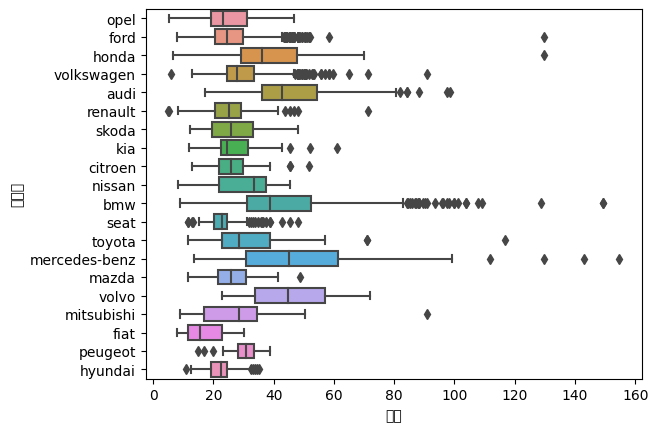

In [80]:
sns.boxplot(x='가격',y='브랜드',data=most1_prd_df)

In [84]:
most1_prd_df[most1_prd_df['브랜드']=='bmw']

ID  생산년도  모델출시년도  브랜드    차량모델명 판매도시 판매구역    주행거리   배기량  \
262    TRAIN_00262  2009    2005  bmw  seria-3  LEB  POM  198000  1995   
313    TRAIN_00313  2009    2006  bmw       x5  KRA  MAL  157827  2996   
405    TRAIN_00405  2009    2004  bmw  seria-1  IKT  SLA  196750  1995   
603    TRAIN_00603  2009    2003  bmw  seria-5  WOY  MAZ  221666  1995   
703    TRAIN_00703  2009    2005  bmw  seria-3  KMV  LOD  219000  2993   
...            ...   ...     ...  ...      ...  ...  ...     ...   ...   
56914  TRAIN_56914  2009    2003  bmw  seria-5  POZ  WIE  237000  2993   
57397  TRAIN_57397  2009    2005  bmw  seria-3  TYR  LUU  302500  1995   
57448  TRAIN_57448  2009    2006  bmw       x5  LIM  MAL  230458  2993   
57570  TRAIN_57570  2009    2005  bmw  seria-3  KXH  POM  208120  1995   
57744  TRAIN_57744  2009    2004  bmw  seria-1  IAP  WIE  130225  1995   

       압축천연가스(CNG)  경유  가솔린  하이브리드  액화석유가스(LPG)     가격  
262              0   0    1      0            0  38.87  
313              0   0    1      0            0  93.47  
405              0   1    0      0            0  28.47  
603              0   1    0      0            0  49.27  
703              0   1    0      0            0  45.37  
...            ...  ..  ...    ...          ...    ...  
56914            0   1    0      0            0  50.70  
57397            0   1    0      0            0  31.07  
57448            0   1    0      0            0  81.77  
57570            0   0    1      0            0  32.49  
57744            0   0    1      0            0  29.25  

[316 rows x 15 columns]

In [81]:
# 상위 1개 연식(생산년도)
most4_prd = train_df['생산년도'].value_counts().index[:4]
most4_prd = list(most4_prd)
most4_prd_df = train_df[train_df['생산년도'].isin(most4_prd)]
most4_prd_df['생산년도'].value_counts()

생산년도
2009    4306
2017    4175
2008    4091
2010    3942
Name: count, dtype: int64

<Axes: xlabel='가격', ylabel='브랜드'>

c:\Users\user\miniconda3\envs\py\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\miniconda3\envs\py\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\miniconda3\envs\py\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 48652 (\N{HANGUL SYLLABLE BEU}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\miniconda3\envs\py\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 47004 (\N{HANGUL SYLLABLE RAEN}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\miniconda3\envs\py\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\miniconda3\envs\py\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Gl

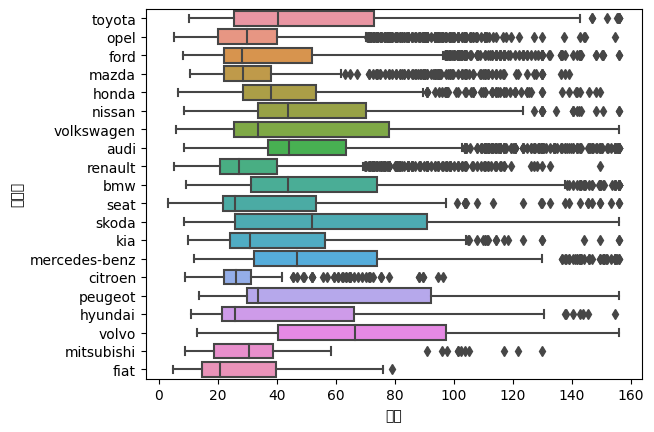

In [82]:
sns.boxplot(x='가격',y='브랜드',data=most4_prd_df)

In [61]:
import numpy as np
import matplotlib.pyplot as plt

brand_names = np.unique(train_df['브랜드'].values)
brand_names ,len(brand_names)

(array(['audi', 'bmw', 'citroen', 'fiat', 'ford', 'honda', 'hyundai',
        'kia', 'mazda', 'mercedes-benz', 'mitsubishi', 'nissan', 'opel',
        'peugeot', 'renault', 'seat', 'skoda', 'toyota', 'volkswagen',
        'volvo'], dtype=object),
 20)

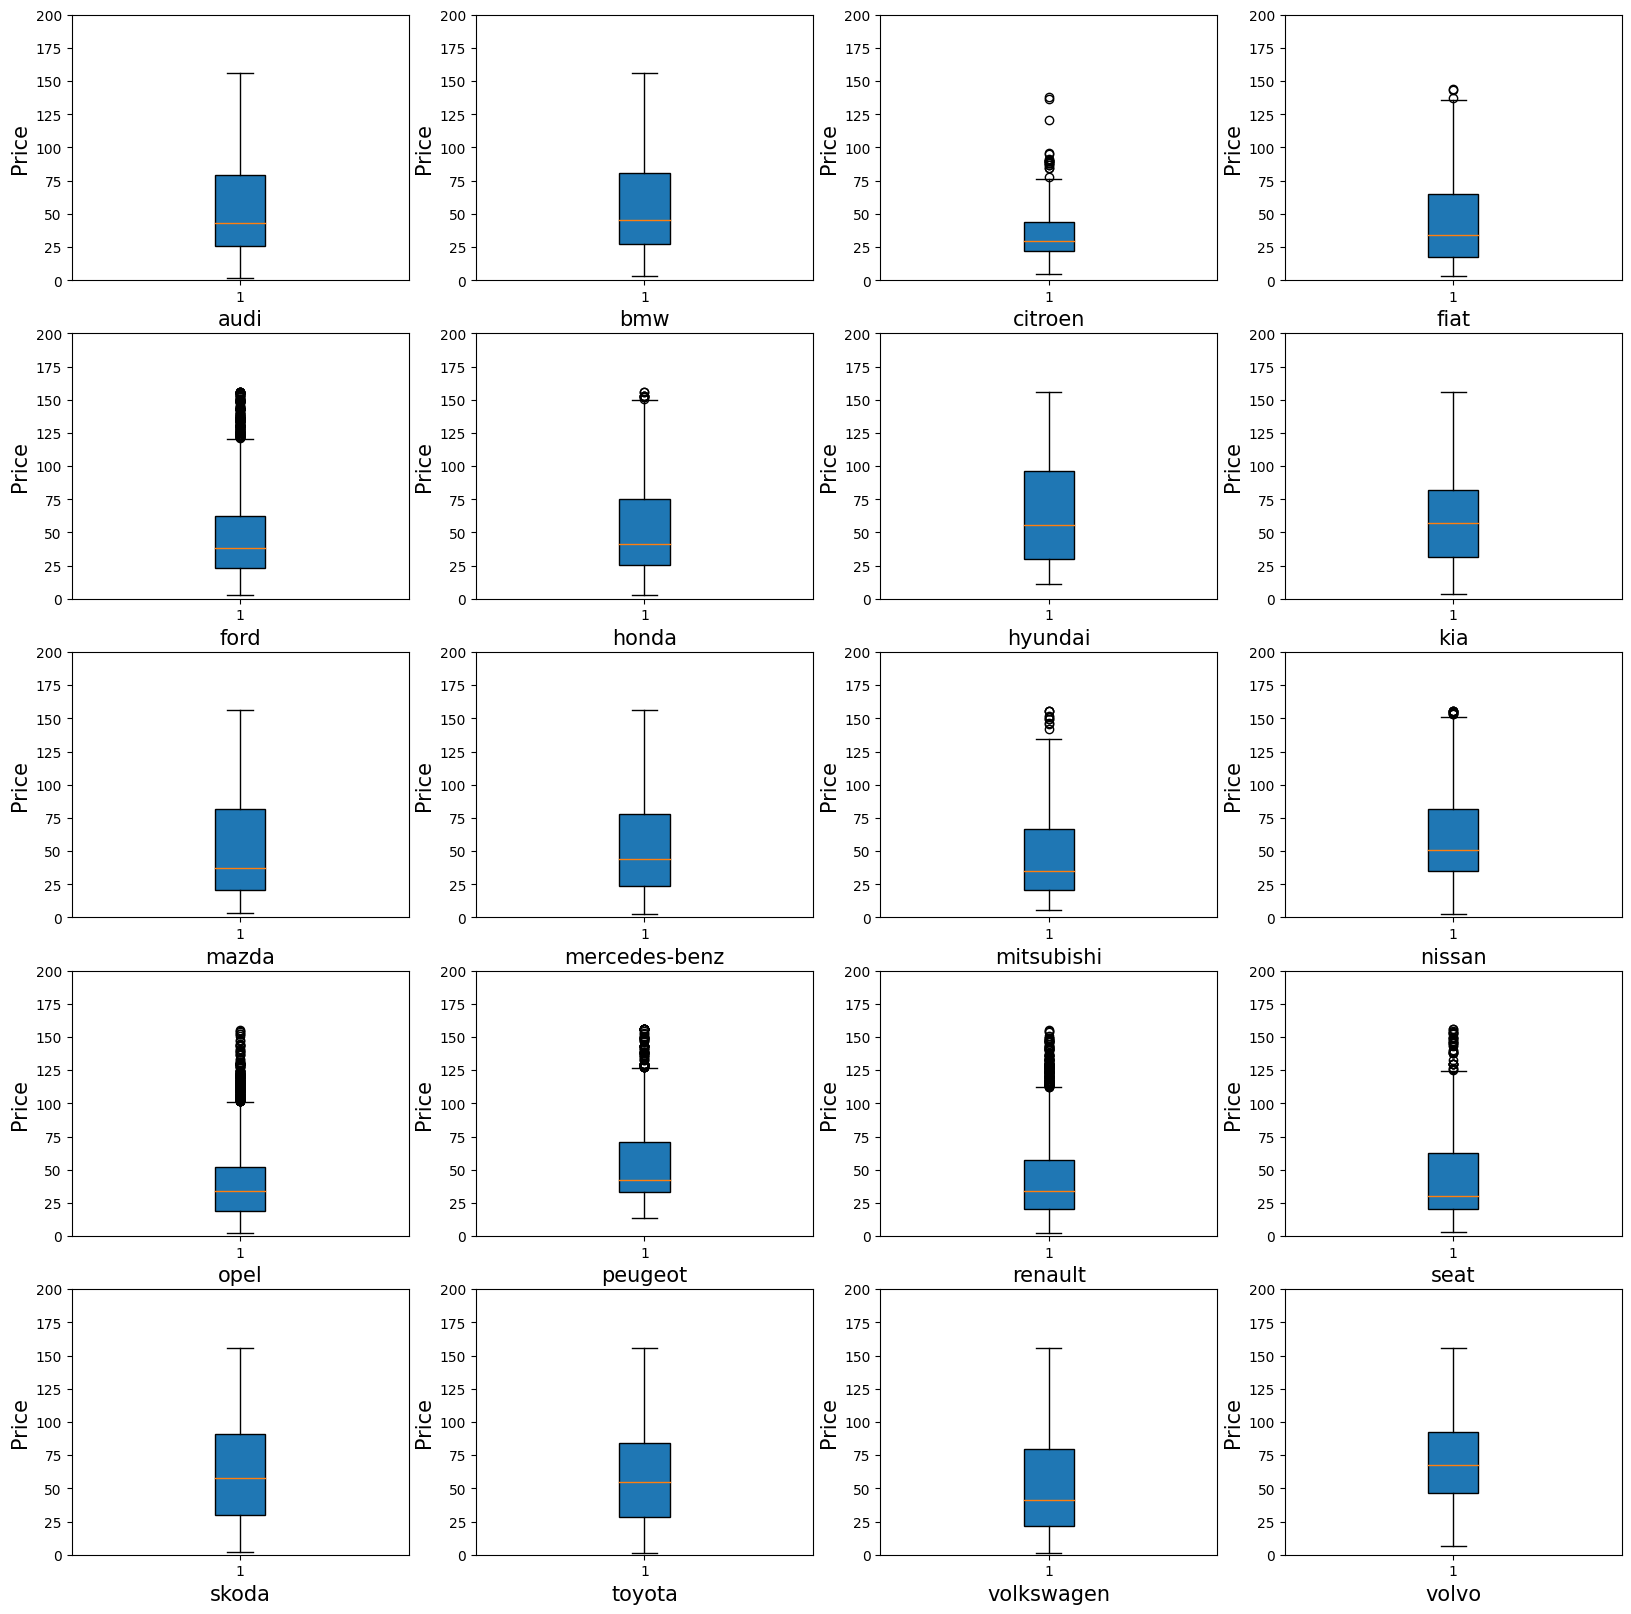

In [33]:
plt.figure(figsize=((20,20)))
for idx,brand in enumerate(brand_names):
    idx += 1
    plt.subplot(5,4,idx)
    plt.boxplot(list(train_df[train_df['브랜드']==brand]['가격'].values),patch_artist=True)
    plt.xlabel(brand,fontsize = 15)
    plt.ylim(0,200)
    plt.ylabel('Price',fontsize = 15)